## KMeans

Initialized cluster centers, assigning points to each cluster and repeating this process trying to minimize Euclidean distance from points to cluster centers with each iteration.

Outliers were calculated as being the point that was the furthest Euclidean distance away from its cluster center

In [6]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import 	numpy as np
import re
import sys
import csv
from sklearn import preprocessing
import sklearn.metrics as met
from sklearn.decomposition import PCA
import matplotlib.cm as cm


df1=pd.read_csv('team_out_1.csv')
df2=pd.read_csv('team_out_a2.csv')
df3=pd.read_csv('team_out_a3.csv')
df4=pd.read_csv('team_out_Yash.csv')
df5=pd.read_csv('team_out_Yash_part1.csv')

df=df1.append(df2)
df=df.append(df3)
df=df.append(df4)
df=df.append(df5)


df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)
# df=df[df.Total_Expenses>0]
df

,Filename,EIN,Program_Exp,Liabilities_To_Asset,Working_Capital,Surplus_Margin,Total_Expenses
0,201523229349300327.xml,510311790.0,0.989619,0.091802,1.574677,-0.078663,464318.0
1,201543089349301829.xml,261460932.0,0.965378,0.000000,3.910347,-0.042674,27439.0
2,201533179349306298.xml,270609504.0,0.942276,0.049206,0.655152,0.088597,384828.0
3,201533209349304768.xml,521548962.0,0.384526,0.000814,30.392756,0.633126,50912.0
4,201533179349307343.xml,731653383.0,0.620560,0.029487,1.083739,0.105901,28123.0
5,201533189349300608.xml,237324566.0,0.758902,0.736982,-0.176215,-0.003914,608126.0
6,201523069349301367.xml,43259150.0,0.736312,0.181998,0.378592,0.057534,212968.0
7,201533069349300963.xml,621273871.0,0.644822,0.234247,14.413163,0.496122,1426413.0
8,201523099349300542.xml,541897455.0,0.845659,0.138531,0.414986,-0.016769,461512.0
9,201533099349301033.xml,251869168.0,0.762357,0.000000,8.673984,0.122244,102044.0


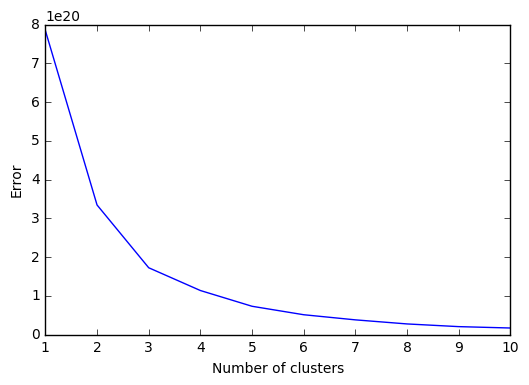

In [4]:


%matplotlib inline

temp_df=df[['Program_Exp','Liabilities_To_Asset','Working_Capital','Surplus_Margin','Total_Expenses']]


def evaluate_clusters(metrics_df,max_clusters):
    error = np.zeros(max_clusters+1)
    error[0] = 0;
    for k in range(1,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit(metrics_df)
        error[k] = kmeans.inertia_

    plt.plot(range(1,len(error)),error[1:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Error')


evaluate_clusters(temp_df,10)

Through the graph we determined number of clusters to be 5

----Initialization complete-------
data1 = 38240
data2 = 19794
data3 = 23592
data4 = 20410
data5 = 6126
data1 length after 1st merge = 58034
data1 length after (subtract 19120, have spaces after scraping): 81626
normalized dataframe
                  0             1             2             3         4
0      2.131339e-06  1.977141e-07  3.391377e-06 -1.694160e-07  1.000000
1      3.518269e-05  0.000000e+00  1.425105e-04 -1.555219e-06  1.000000
2      2.448563e-06  1.278658e-07  1.702455e-06  2.302254e-07  1.000000
3      7.552761e-06  1.598110e-08  5.969663e-04  1.243570e-05  1.000000
4      2.206591e-05  1.048490e-06  3.853569e-05  3.765625e-06  1.000000
5      1.247935e-06  1.211890e-06 -2.897675e-07 -6.435478e-09  1.000000
6      3.457386e-06  8.545792e-07  1.777695e-06  2.701533e-07  1.000000
7      4.520587e-07  1.642210e-07  1.010448e-05  3.478109e-07  1.000000
8      1.832367e-06  3.001670e-07  8.991878e-07 -3.633486e-08  1.000000
9      7.470870e-06  0.000000e+00  8.500239e-05

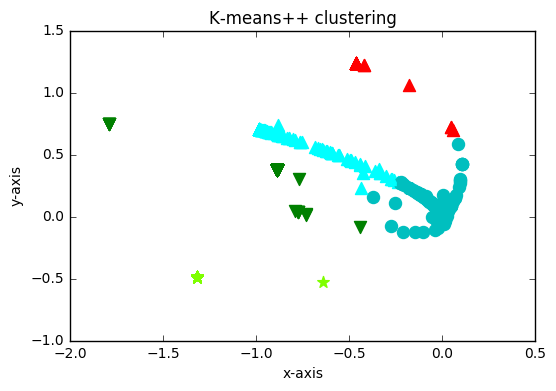

In [7]:
class kmeans_clustering:

    def __init__(self, file_1, file_2, file_3,file_4,file_5):
        self.file1 = file_1
        self.file2 = file_2
        self.file3 = file_3
        self.file4 = file_4
        self.file5 = file_5
        self.df = pd.DataFrame()
        self.df_norm = pd.DataFrame()
        print('----Initialization complete-------')

    def read_data(self):
        f1 = open(self.file1, 'r')
        f2 = open(self.file2, 'r')
        f3 = open(self.file3, 'r')
        f4 = open(self.file4, 'r')
        f5 = open(self.file5, 'r')


        reader = csv.reader(f1)
        data1 = list(reader)

        reader = csv.reader(f2)
        data2 = list(reader)

        reader = csv.reader(f3)
        data3 = list(reader)
        
        reader = csv.reader(f4)
        data4 = list(reader)
        
        reader = csv.reader(f5)
        data5 = list(reader)

        print('data1 = ' + str(len(data1)))
        print('data2 = ' + str(len(data2)))
        print('data3 = ' + str(len(data3)))
        print('data4 = ' + str(len(data4)))
        print('data5 = ' + str(len(data5)))


        data1.extend(data2)
        print('data1 length after 1st merge = ' + str(len(data1)))

        data1.extend(data3)
        print('data1 length after (subtract 19120, have spaces after scraping): ' + str(len(data1)))
        
        data1.extend(data4)
        data1.extend(data5)
        

        fa = [ ]
        fb = [ ]
        fc = [ ]
        fd = [ ]
        fe = [ ]

        for i in range(0, len(data1)):
            if len(data1[i]) != 0:
                fa.append(float(data1[i][2])) # feature1:prog-expense-ratio
                fb.append(float(data1[i][3])) # feature2:asset-liability-ratio
                fc.append(float(data1[i][4])) # feature3:working-capital-ratio
                fd.append(float(data1[i][5])) # feature4:surplus-margin
                fe.append(float(data1[i][6])) # feature5:total-amt
		
        dfa = pd.DataFrame(fa)
        dfb = pd.DataFrame(fb)
        dfc = pd.DataFrame(fc)
        dfd = pd.DataFrame(fd)
        dfe = pd.DataFrame(fe)

        self.df = pd.concat([dfa, dfb, dfc, dfd, dfe], axis = 1)
		#print('dataframe df combined')
		#print(self.df)
	
    def create_clusters(self):
        array_norm  = preprocessing.normalize(self.df)
		#self.df_norm = pd.DataFrame(preprocessing.normalize(self.df))
        
        global norm_array
        norm_array=array_norm
        
        
        print('normalized dataframe')
        print(pd.DataFrame(array_norm))
        print('compute kmeans clusters')

        num = 2

		#Uncomment the following code if you want to evaluate best cluster#
# 		'''
# 		for i in range(0,10):
# 			kmeans = KMeans(init='k-means++', n_clusters=num, n_init=10)
# 			kmeans.fit_predict(array_norm)
# 			error = kmeans.inertia_
# 			#print(" Total error with " + str(num) + " clusters = " + str(error))
# 			num = num + 1
# 			score = met.silhouette_score(array_norm, kmeans.labels_, metric='euclidean',sample_size=1000)
# 			print('# clusters : ' + str(num) + 'silhoutte coefficent : ' + str(score))
# 		'''

		# Run kmeans on best clusters#
		
        kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)

        global k
        k=kmeans.fit_predict(array_norm)
        
        global cluster_labels
        cluster_labels = kmeans.labels_

        
        global cluster_centers
        cluster_centers=kmeans.cluster_centers_
        print('-------------------------------------')
        score = met.silhouette_score(array_norm, kmeans.labels_, metric='euclidean',sample_size=1000)
        print('silhoutte coefficent : ' + str(score))

        #PCA to lower dimensionality of the data
        pca_2 = PCA(2)
        plot_columns = pca_2.fit_transform(array_norm)
        
        plt.xlabel("x-axis")
        plt.ylabel("y-axis")
        plt.title("K-means++ clustering")

        i=0

        for sample in plot_columns:
            if kmeans.labels_[i] == 0:
                plt.scatter(sample[0],sample[1],color="c",s=75,marker="o")
            if kmeans.labels_[i] == 1:
                plt.scatter(sample[0],sample[1],s=75,marker="*",color="chartreuse")
            if kmeans.labels_[i] == 2:
                plt.scatter(sample[0],sample[1],color="green",s=75,marker="v")
            if kmeans.labels_[i] == 3:
                plt.scatter(sample[0],sample[1],color="cyan",s=75,marker="^")
            if kmeans.labels_[i] == 4:
                plt.scatter(sample[0],sample[1],color="red",s=75,marker="^")
            i += 1
        plt.show()


file_1 = 'team_out_1.txt'
file_2 = 'team_out_a2.txt'
file_3 = 'team_out_a3.txt'
file_4='team_out_Yash.txt'
file_5='team_out_Yash_part1.txt'

k=[]
norm_array=[]
cluster_centers=[]
cluster_labels = []
class_instance = kmeans_clustering(file_1, file_2, file_3,file_4,file_5)
class_instance.read_data()
class_instance.create_clusters()



In [64]:
#OUTLIER ANALYSIS
from sklearn import preprocessing

def distance(v1,centroid):
    maxx = 0
    for i,value in enumerate(v1):
        temp1 = np.sqrt(np.sum((v1[i]-centroid)**2))
        if(temp1>maxx):
            maxx = temp1
            max_val = []
            max_val.append(value)
            max_val.append(i)
            max_val.append(temp1)
    return max_val


cluster1 = np.where(cluster_labels==0)
cluster2 = np.where(cluster_labels==1)
cluster3 = np.where(cluster_labels==2)
cluster4 = np.where(cluster_labels==3)
cluster5 = np.where(cluster_labels==4)

norm_df=df.copy()
norm_df=norm_df[['Program_Exp','Liabilities_To_Asset','Working_Capital','Surplus_Margin','Total_Expenses']]
x = norm_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
norm_df = pd.DataFrame(x_scaled)

outliers = pd.DataFrame()
outliers_index = []

cluster1_entries = norm_df.loc[cluster1].as_matrix()
outlier_cluster1 = distance(cluster1_entries,cluster_centers[0])
outliers_index.append(cluster1[0][outlier_cluster1[1]])

cluster2_entries = norm_df.loc[cluster2].as_matrix()
outlier_cluster2 = distance(cluster2_entries,cluster_centers[1])
outliers_index.append(cluster2[0][outlier_cluster2[1]])

cluster3_entries = norm_df.loc[cluster3].as_matrix()
outlier_cluster3 = distance(cluster3_entries,cluster_centers[2])
outliers_index.append(cluster3[0][outlier_cluster3[1]])

cluster4_entries = norm_df.loc[cluster4].as_matrix()
outlier_cluster4 = distance(cluster4_entries,cluster_centers[3])
outliers_index.append(cluster4[0][outlier_cluster4[1]])

cluster5_entries = norm_df.loc[cluster5].as_matrix()
outlier_cluster5 = distance(cluster5_entries,cluster_centers[4])
outliers_index.append(cluster5[0][outlier_cluster5[1]])

df.loc[outliers_index]



,Filename,EIN,Program_Exp,Liabilities_To_Asset,Working_Capital,Surplus_Margin,Total_Expenses
31116,201610419349301801.xml,521221108.0,0.400001,16883.315790,-1.915329,-9.796983,167472.0
49876,201641329349301804.xml,232787307.0,1.000000,2728.935484,-234.905556,0.000000,360.0
70485,201513299349300711.xml,481252775.0,0.000000,0.000000,0.000000,0.008741,0.0
54408,201610439349303016.xml,561949970.0,1.000000,0.000000,1.000000,0.000000,1.0
2827,201542589349300999.xml,352090479.0,0.857410,0.217362,298.930677,-12877.666670,4818.0


## Results

These 5 businesses are the outliers for each of their clusters, they can all be seen as financially inefficient because their metrics are lacking in some aspects. For instance the first two have very high liabilities to assets ratio but low working capital ratio. On the other hand, the last row has very high working capital ratio but low and very negative surplus margin